# 04_exploratory_analysis
Exploratory Data Analysis (EDA) on the enriched dataset (`master_with_topics.csv`).

**What this notebook does**
1. Load `master_with_topics.csv`
2. Basic summary (shape, date range, missing values)
3. Time‑series plots for rainfall, discharge, reservoir, load
4. Overlay/inspect text-derived features (keyword flags, LDA topics)
5. Correlations (including simple lagged correlation vs. load)
6. Seasonality views (monthly/weekday averages; optional decomposition)
7. Quick comparisons (flagged vs. non-flagged days)


### Cell 1 — Imports & config

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

plt.rcParams['figure.figsize'] = (10, 4)  # default plot size
DATA_PATH = "master_with_topics.csv"      # expected input
print("Expecting:", Path(DATA_PATH).resolve())

Expecting: C:\Users\abhis\Desktop\Big Data\Hydropower decision support system\master_with_topics.csv


### Cell 2 — Load dataset

In [2]:
df = pd.read_csv(DATA_PATH, parse_dates=['date']).sort_values('date').reset_index(drop=True)
print(df.shape)
print(df[['date']].agg(['min','max']))
df.head()

(1796, 81)
          date
min 2019-01-31
max 2023-12-31


,date,discharge_m3s,reservoir_m,rainfall_mm,load_MW,avg_load_mw,energy_mwh,year,doy,dow,...,maintenance_flag,outage_flag,flood_flag,policy_flag,weather_flag,topic0,topic1,topic2,topic3,topic4
0,2019-01-31,120.0,0.64,0.0,1428.760,946.092065,28941.248,2019.0,31,3,...,0.0,0.0,0.0,0.0,0.0,0.071865,0.13978,0.341538,0.28139,0.165426
1,2019-02-01,132.0,0.72,0.0,1437.155,970.446968,29686.272,2019.0,32,4,...,0.0,0.0,0.0,0.0,0.0,0.071865,0.13978,0.341538,0.28139,0.165426
2,2019-02-02,131.0,0.71,0.0,1395.755,967.499629,29596.112,2019.0,33,5,...,0.0,0.0,0.0,0.0,0.0,0.071865,0.13978,0.341538,0.28139,0.165426
3,2019-02-03,131.0,0.71,0.0,1352.055,926.954500,28355.824,2019.0,34,6,...,0.0,0.0,0.0,0.0,0.0,0.071865,0.13978,0.341538,0.28139,0.165426
4,2019-02-04,134.0,0.73,0.0,1373.905,918.874032,28108.640,2019.0,35,0,...,0.0,0.0,0.0,0.0,0.0,0.071865,0.13978,0.341538,0.28139,0.165426


### Cell 3 — Schema & missing values

In [3]:
print("Columns:", len(df.columns))
print(df.columns.tolist()[:40])

na_counts = df.isna().sum().sort_values(ascending=False)
print("Top 20 columns by missing values:")
na_counts.head(20)

Columns: 81
['date', 'discharge_m3s', 'reservoir_m', 'rainfall_mm', 'load_MW', 'avg_load_mw', 'energy_mwh', 'year', 'doy', 'dow', 'month', 'doy_sin', 'doy_cos', 'rainfall_mm_lag1', 'rainfall_mm_lag2', 'rainfall_mm_lag3', 'rainfall_mm_lag7', 'rainfall_mm_lag14', 'rainfall_mm_rmean3', 'rainfall_mm_rstd3', 'rainfall_mm_rmean7', 'rainfall_mm_rstd7', 'rainfall_mm_rmean14', 'rainfall_mm_rstd14', 'rainfall_mm_rmean30', 'rainfall_mm_rstd30', 'discharge_m3s_lag1', 'discharge_m3s_lag2', 'discharge_m3s_lag3', 'discharge_m3s_lag7', 'discharge_m3s_lag14', 'discharge_m3s_rmean3', 'discharge_m3s_rstd3', 'discharge_m3s_rmean7', 'discharge_m3s_rstd7', 'discharge_m3s_rmean14', 'discharge_m3s_rstd14', 'discharge_m3s_rmean30', 'discharge_m3s_rstd30', 'reservoir_m_lag1']
Top 20 columns by missing values:


load_MW_diff1            60
load_MW                  56
avg_load_mw              56
energy_mwh               56
year                     56
load_MW_rstd3            55
load_MW_lag1             55
load_MW_rstd14           54
load_MW_lag2             54
load_MW_rmean14          54
load_MW_rstd7            53
load_MW_rmean7           53
load_MW_lag3             53
load_MW_lag7             49
load_MW_rmean3           46
load_MW_lag14            45
reservoir_m_rstd30       28
reservoir_m_rmean30      28
discharge_m3s_rmean30    28
discharge_m3s_rstd30     28
dtype: int64

### Cell 4 — Helper functions

In [4]:
def first_existing(cols):
    for c in cols:
        if c in df.columns:
            return c
    return None

COL_LOAD = first_existing(['load_MW','peak_load_mw','avg_load_mw'])
COL_RAIN = first_existing(['rainfall_mm','rain_mm'])
COL_Q    = first_existing(['discharge_m3s','discharge_cms','Q_cms'])
COL_RES  = first_existing(['reservoir_m','gauge_m'])

print("Detected columns ->",
      "load:", COL_LOAD, "| rain:", COL_RAIN, "| discharge:", COL_Q, "| reservoir:", COL_RES)

Detected columns -> load: load_MW | rain: rainfall_mm | discharge: discharge_m3s | reservoir: reservoir_m


### Cell 5 — Time-series: rainfall, discharge, reservoir, load

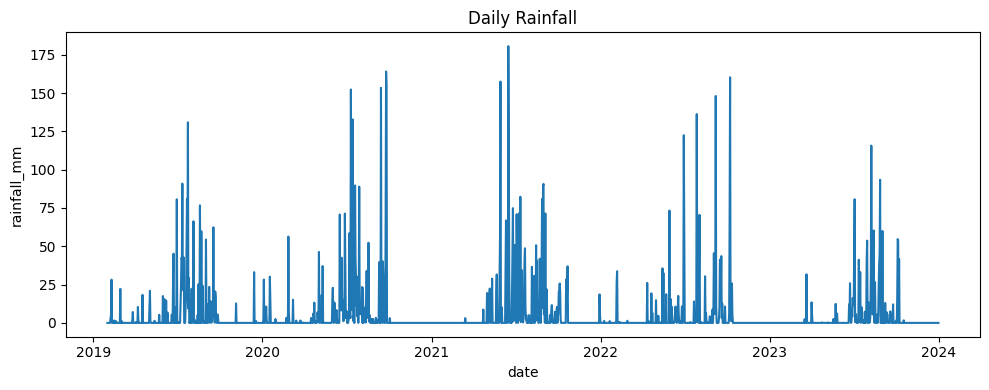

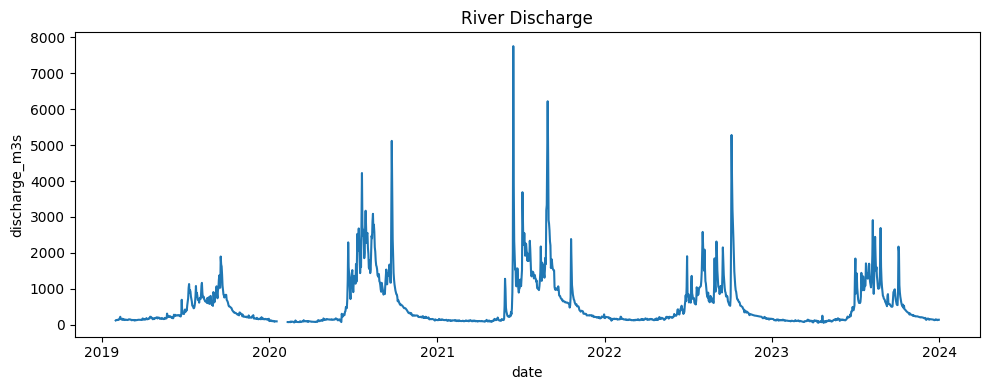

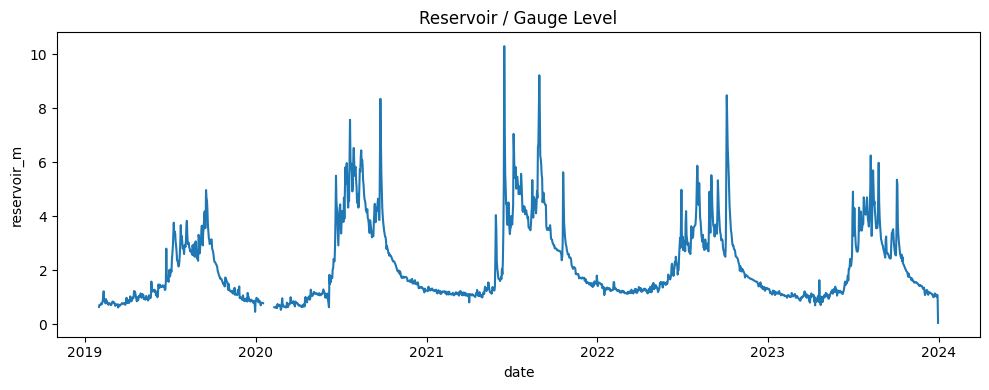

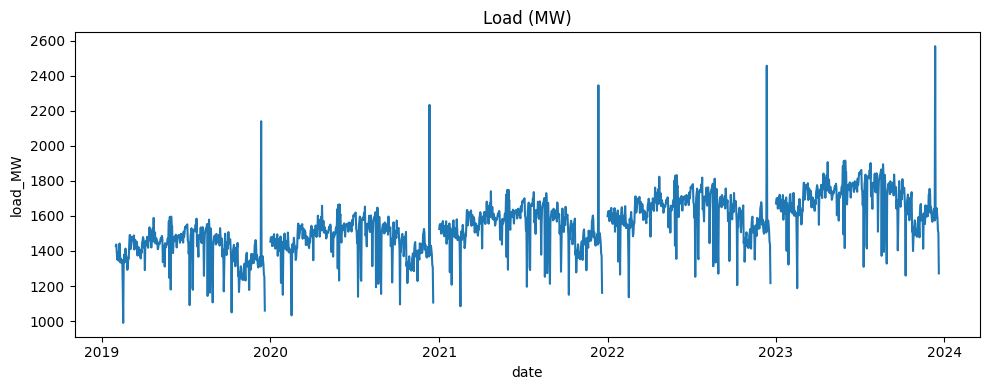

In [5]:
def plot_series(col, title):
    if col and col in df.columns:
        plt.figure()
        plt.plot(df['date'], df[col])
        plt.xlabel('date'); plt.ylabel(col); plt.title(title)
        plt.tight_layout()
        plt.show()

plot_series(COL_RAIN, 'Daily Rainfall')
plot_series(COL_Q,    'River Discharge')
plot_series(COL_RES,  'Reservoir / Gauge Level')
plot_series(COL_LOAD, 'Load (MW)')

### Cell 6 — Text-derived keyword flags overview

In [6]:
flag_cols = [c for c in df.columns if c.endswith('_flag')]
print("Flag columns:", flag_cols)

flag_summary = df[flag_cols].sum().sort_values(ascending=False) if flag_cols else pd.Series(dtype=int)
flag_summary

Flag columns: ['maintenance_flag', 'outage_flag', 'flood_flag', 'policy_flag', 'weather_flag']


maintenance_flag    27.0
weather_flag        27.0
outage_flag         25.0
flood_flag          21.0
policy_flag         19.0
dtype: float64

### Cell 7 — Load with flagged days overlay

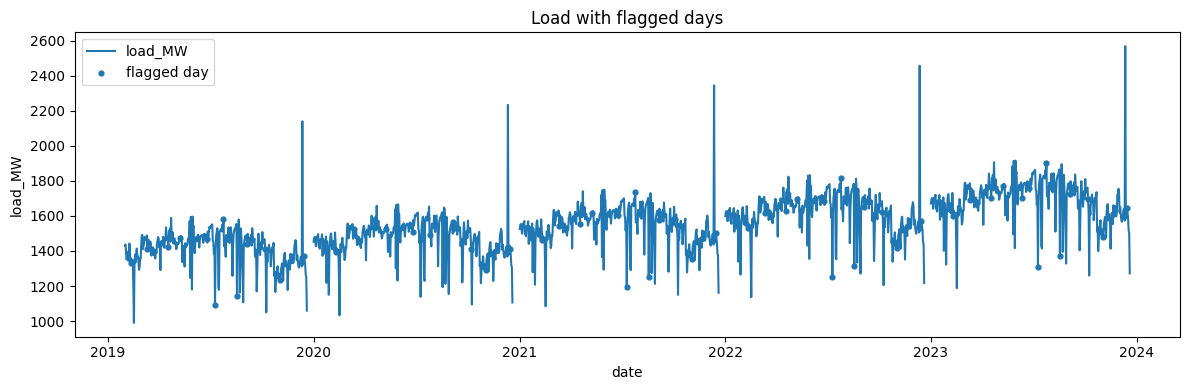

In [7]:
if COL_LOAD and flag_cols:
    plt.figure(figsize=(12,4))
    plt.plot(df['date'], df[COL_LOAD], label=COL_LOAD)
    # mark days with any flag
    any_flag = df[flag_cols].sum(axis=1) > 0
    plt.scatter(df.loc[any_flag, 'date'], df.loc[any_flag, COL_LOAD], s=12, marker='o', label='flagged day')
    plt.xlabel('date'); plt.ylabel(COL_LOAD); plt.title('Load with flagged days')
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print("Skip overlay (no load or no flags).")

### Cell 8 — Correlation matrix & heatmap

Numeric columns: ['discharge_m3s', 'reservoir_m', 'rainfall_mm', 'load_MW', 'avg_load_mw', 'energy_mwh', 'year', 'doy', 'dow', 'month', 'doy_sin', 'doy_cos', 'rainfall_mm_lag1', 'rainfall_mm_lag2', 'rainfall_mm_lag3', 'rainfall_mm_lag7', 'rainfall_mm_lag14', 'rainfall_mm_rmean3', 'rainfall_mm_rstd3', 'rainfall_mm_rmean7', 'rainfall_mm_rstd7', 'rainfall_mm_rmean14', 'rainfall_mm_rstd14', 'rainfall_mm_rmean30', 'rainfall_mm_rstd30', 'discharge_m3s_lag1', 'discharge_m3s_lag2', 'discharge_m3s_lag3', 'discharge_m3s_lag7', 'discharge_m3s_lag14']
corr shape: (80, 80)


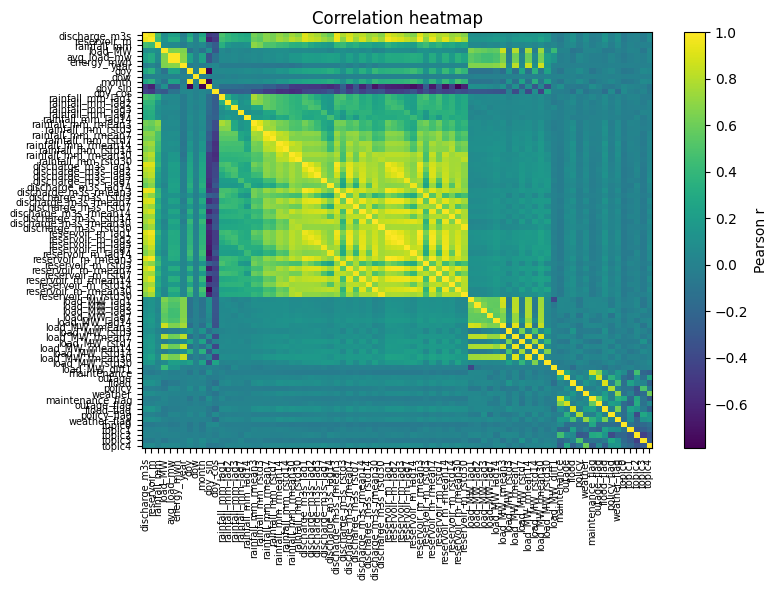

In [8]:
num_df = df.select_dtypes(include=[np.number]).copy()
corr = num_df.corr().fillna(0.0)
print("Numeric columns:", num_df.columns.tolist()[:30])
print("corr shape:", corr.shape)

# Basic heatmap using matplotlib (no seaborn)
plt.figure(figsize=(8,6))
plt.imshow(corr, aspect='auto')
plt.colorbar(label='Pearson r')
plt.title('Correlation heatmap')
plt.xticks(ticks=np.arange(len(corr.columns)), labels=corr.columns, rotation=90, fontsize=7)
plt.yticks(ticks=np.arange(len(corr.columns)), labels=corr.columns, fontsize=7)
plt.tight_layout()
plt.show()

### Cell 9 — Lagged correlation vs. load (rain, discharge, reservoir)

In [9]:
if COL_LOAD:
    base = df[['date', COL_LOAD]].copy().dropna()
    lags = range(0, 31)  # 0..30 days
    results = []

    for col in [COL_RAIN, COL_Q, COL_RES]:
        if not col: 
            continue
        tmp = df[['date', col]].copy()
        for L in lags:
            tmp[f'{col}_lag{L}'] = tmp[col].shift(L)
        merged = base.merge(tmp.drop(columns=[col]), on='date', how='left')
        for L in lags:
            r = merged[COL_LOAD].corr(merged[f'{col}_lag{L}'])
            results.append({'feature': col, 'lag': L, 'r': r})

    res = pd.DataFrame(results).dropna().sort_values(['feature','lag']).reset_index(drop=True)
    print(res.groupby('feature')['r'].max())
    res.head()
else:
    print("Skip lagged correlation (no load column detected).")

feature
discharge_m3s    0.086112
rainfall_mm      0.083110
reservoir_m      0.122230
Name: r, dtype: float64


### Cell 10 — Seasonality (monthly & weekday averages)

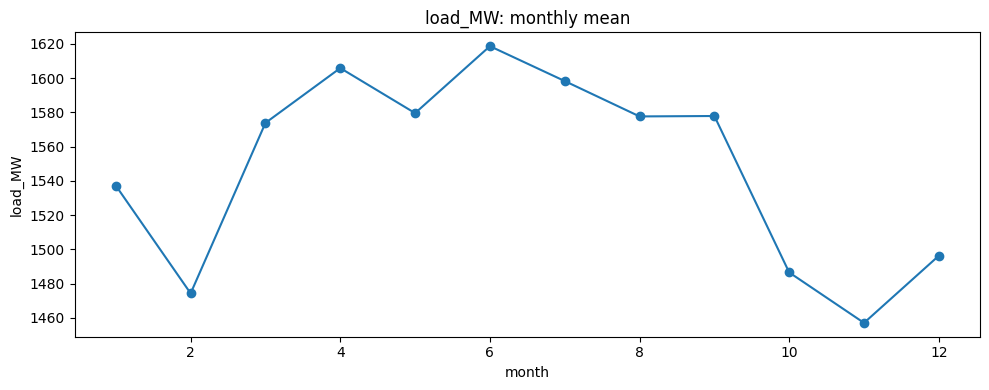

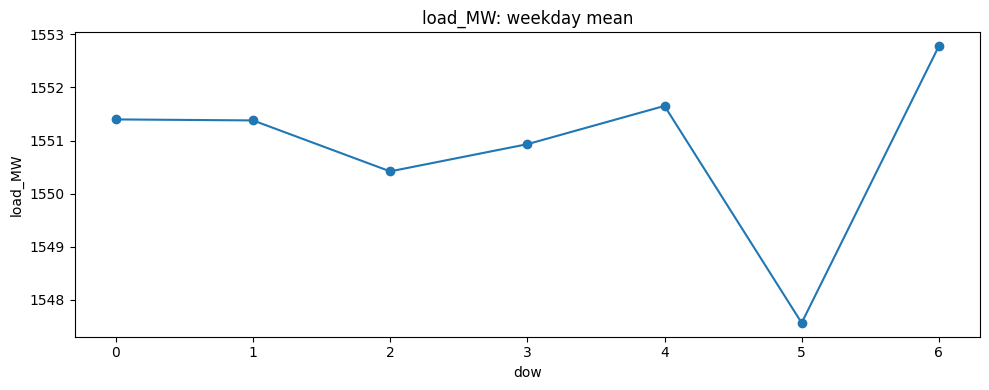

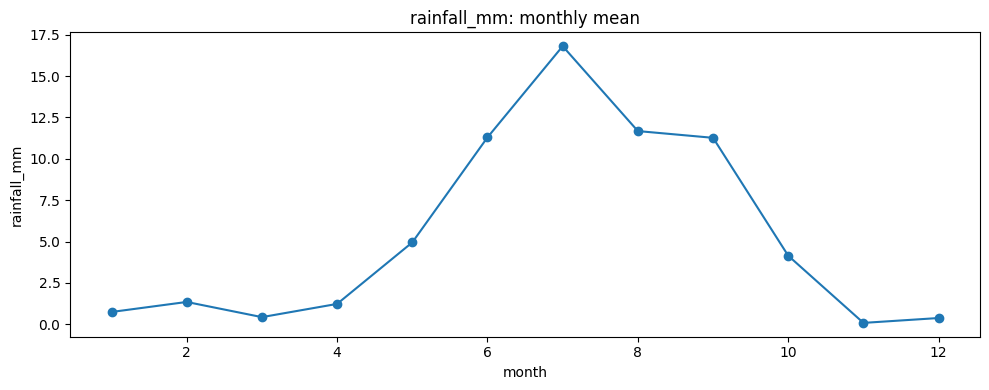

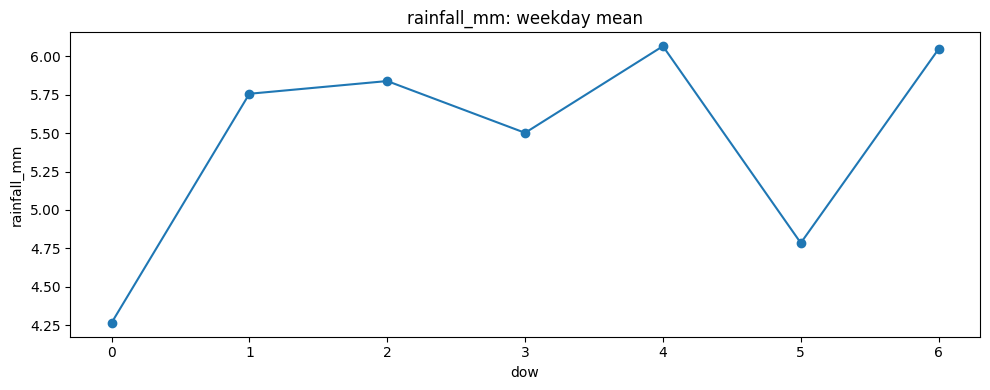

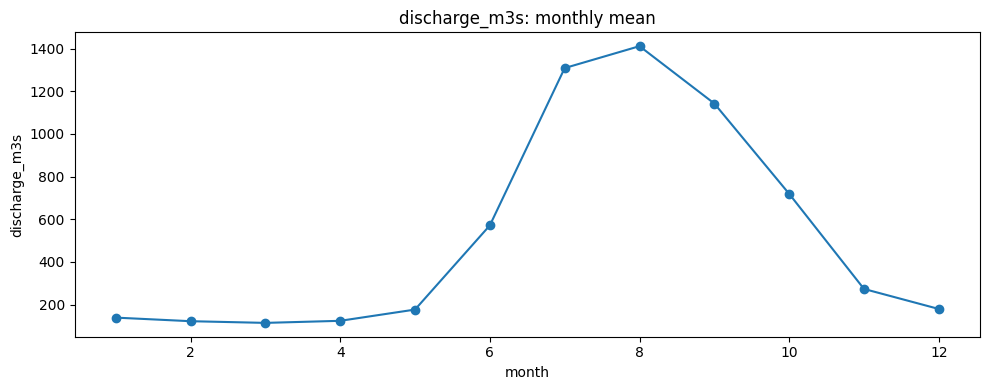

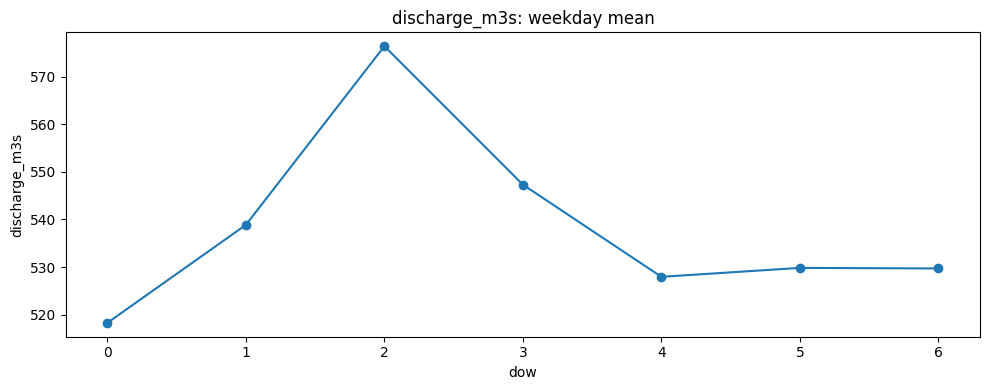

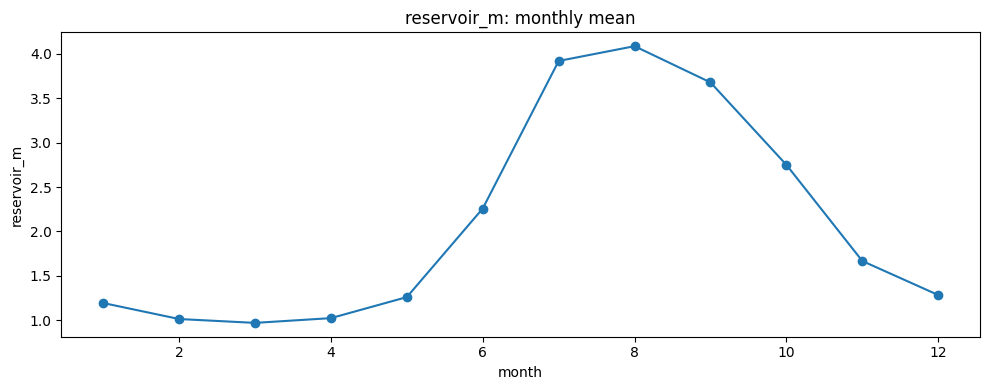

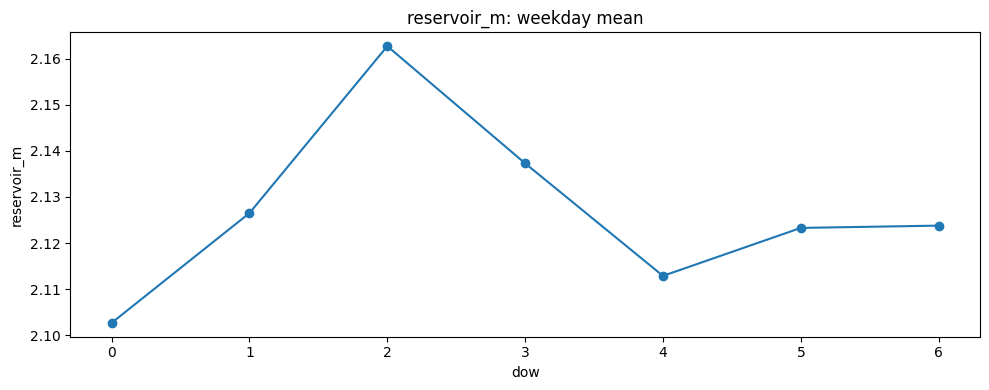

In [10]:
df['month'] = df['date'].dt.month
df['dow'] = df['date'].dt.weekday  # 0=Mon

def plot_group_mean(col, by, title):
    if col in df.columns:
        m = df.groupby(by)[col].mean()
        plt.figure()
        plt.plot(m.index, m.values, marker='o')
        plt.title(title); plt.xlabel(by); plt.ylabel(col)
        plt.tight_layout(); plt.show()

for col in [c for c in [COL_LOAD, COL_RAIN, COL_Q, COL_RES] if c]:
    plot_group_mean(col, 'month', f'{col}: monthly mean')
    plot_group_mean(col, 'dow',   f'{col}: weekday mean')

### Cell 12 — Compare load on flagged vs. normal days

In [12]:
if COL_LOAD and 'flood_flag' in df.columns:
    df['_any_flag'] = (df[[c for c in df.columns if c.endswith('_flag')]].sum(axis=1) > 0).astype(int)
    grp = df.groupby('_any_flag')[COL_LOAD].agg(['count','mean','std','median'])
    print(grp)
else:
    print("Skip comparison (need load and at least one *_flag column).")

           count         mean         std     median
_any_flag                                           
0           1667  1552.129970  150.246201  1548.9408
1             73  1522.193571  161.922412  1543.5000


### Cell 13 — Notes / Findings (fill in)
- Summarize which features correlate with load (and at what lags).
- Highlight months/seasons with different behavior.
- Comment on how keyword flags and topics align with spikes/dips.
- Note any outliers or missing data patterns to handle before modeling.
